In [1]:
from typing import Callable, Sequence
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline

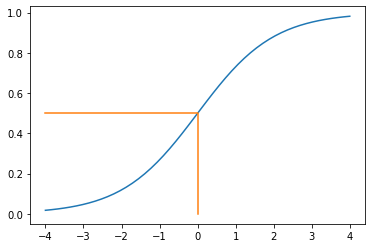

In [2]:
x = np.linspace(-4, 4)
y = expit(x)
plt.plot(x, y)
plt.plot((-4, 0, 0), (0.5, 0.5, 0))

In [3]:
from regression import BaseRegression

In [4]:
class LogisticRegression(BaseRegression):
    
    def get_hypothesis(self, theta: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
        def h(x: np.ndarray) -> np.ndarray:
            return expit(theta.T @ x.T)
        return h

    def cost_function(self, h: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
        h_x = h(self.features)
        return (-(self.outputs * np.log(h_x).T) - ((1 - self.outputs) * np.log(1 - h_x).T)).sum()
    
    def delta(self, theta: np.ndarray) -> np.ndarray:
        return self.features.T @ (expit(self.features @ theta) - self.outputs)
    

In [5]:
x = np.random.rand(100, 1) * 10
y = np.empty((100, 1))
for i, _x in enumerate(x):
    if _x < 4:
        y[i] = 1
    else:
        y[i] = 0
test = LogisticRegression(x, y, scale_features=False)
#theta, h, num_steps = test.gradient_descent(a=0.05, iterations=500)
theta, h, num_steps = test.gradient_descent(a=0.1, convergence_threshold=0.001)

In [6]:
for _x, _y in zip(test.features, y):
    plt.plot(_x[1], _y, 'bo')
test_range = np.linspace(0, 10, 50)
plt.plot(list(test_range), [test.get_prediction(i) for i in test_range])

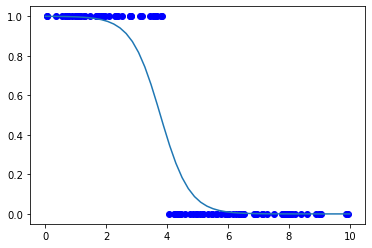

In [7]:
#for i in np.linspace(0, 10, 100):
#    plt.plot(i, h(np.array([1, i])), 'ro')


In [8]:
class OneVsAll:
    
    def __init__(self, features: Sequence[Sequence[float]], outputs: Sequence[int]):
        self.features = features
        self.outputs = outputs
        self.output_classes = np.unique(outputs)
        print('output classes: {}.'.format(self.output_classes))
        self.models = {}
        for oc in self.output_classes:
            oc = int(oc)
            modified_outputs = outputs.copy()
            for i, y in enumerate(outputs):
                if y == oc:
                    modified_outputs[i] = 1
                else:
                    modified_outputs[i] = 0
            model = LogisticRegression(features, modified_outputs, scale_features = False)
            model.gradient_descent(0.1, convergence_threshold = 0.001)
            self.models[oc] = model
    
    def get_prediction(self, features: Sequence[float], add_x0: bool = True) -> int:
        predictions = {oc: self.models[oc].get_prediction(features, add_x0=add_x0) for oc in self.output_classes}
        return max(predictions, key=lambda k: predictions[k])
        #return predictions
        
        

In [9]:
x1 = np.random.rand(100, 1) * 10
y1 = np.empty((100, 1))
for i, _x in enumerate(x1):
    if _x < 2:
        y1[i] = 0
    elif _x < 6:
        y1[i] = 1
    else:
        y1[i] = 2

In [10]:
test = OneVsAll(x1, y1)

output classes: [0. 1. 2.].


In [11]:
for i in range(10):
    print(i, test.get_prediction(i))

0 0.0
1 0.0
2 1.0
3 1.0
4 1.0
5 1.0
6 2.0
7 2.0
8 2.0
9 2.0
